In [230]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [164]:
train = pd.read_csv('../datasets/train.csv',
                   na_values = '',
                   keep_default_na = False)
test = pd.read_csv('../datasets/test.csv',
                  na_values = '',
                   keep_default_na = False)

In [165]:
test.columns = [x.lower().replace(' ','_') for x in test.columns]
train.columns = [x.lower().replace(' ','_') for x in train.columns]

In [166]:
train.drop(columns=['pool_qc', 'misc_feature', 'alley', 
                    'fence', 'fireplace_qu', 'garage_finish', 
                    'garage_cond', 'garage_yr_blt', 'garage_type', 
                    'bsmt_exposure', 'pid', 'overall_cond', 
                    'low_qual_fin_sf', 'bsmt_half_bath', 'kitchen_abvgr', 
                    'enclosed_porch', 'misc_val', 'yr_sold', 'bsmt_cond',
                    'kitchen_qual', 'mas_vnr_type', 
                    'neighborhood', 'sale_type','street', 'lot_shape', 'utilities', 'land_slope', 'ms_zoning','lot_config','condition_1',
           'condition_2','roof_style','roof_matl','functional'], 
                    axis=1, inplace=True)
test.drop(columns=[ 'pool_qc', 'misc_feature', 'alley', 
                    'fence', 'fireplace_qu', 'garage_finish', 
                    'garage_cond', 'garage_yr_blt', 'garage_type', 
                    'bsmt_exposure', 'pid', 'overall_cond', 
                    'low_qual_fin_sf', 'bsmt_half_bath', 'kitchen_abvgr', 
                    'enclosed_porch', 'misc_val', 'yr_sold',
                    'bsmt_cond', 'kitchen_qual', 
                    'mas_vnr_type', 'neighborhood', 'sale_type','street', 'lot_shape', 'utilities', 'land_slope', 'ms_zoning','lot_config','condition_1',
           'condition_2','roof_style','roof_matl','functional'], 
                    axis=1, inplace=True)

In [167]:
train['lot_frontage'].fillna(0, inplace=True)
train['garage_qual'].fillna('none', inplace=True)
train['bsmtfin_type_2'].fillna('none', inplace=True)
train['bsmt_qual'].fillna('none', inplace=True)
train['bsmtfin_type_1'].fillna('none', inplace=True)
train['mas_vnr_area'].fillna(0, inplace=True)
train['bsmt_full_bath'].fillna(0, inplace=True)
train['garage_cars'].fillna(0, inplace=True)
train['bsmtfin_sf_1'].fillna(0, inplace=True)
train['bsmt_unf_sf'].fillna(0, inplace=True)
train['total_bsmt_sf'].fillna(0, inplace=True)
train['bsmtfin_sf_2'].fillna(0, inplace=True)
train['garage_area'].fillna(0, inplace=True)

test['lot_frontage'].fillna(0, inplace=True)
test['garage_qual'].fillna('none', inplace=True)
test['bsmtfin_type_2'].fillna('none', inplace=True)
test['bsmt_qual'].fillna('none', inplace=True)
test['bsmtfin_type_1'].fillna('none', inplace=True)
test['mas_vnr_area'].fillna(0, inplace=True)
test['bsmt_full_bath'].fillna(0, inplace=True)
test['garage_cars'].fillna(0, inplace=True)
test['bsmtfin_sf_1'].fillna(0, inplace=True)
test['bsmt_unf_sf'].fillna(0, inplace=True)
test['total_bsmt_sf'].fillna(0, inplace=True)
test['bsmtfin_sf_2'].fillna(0, inplace=True)
test['garage_area'].fillna(0, inplace=True)

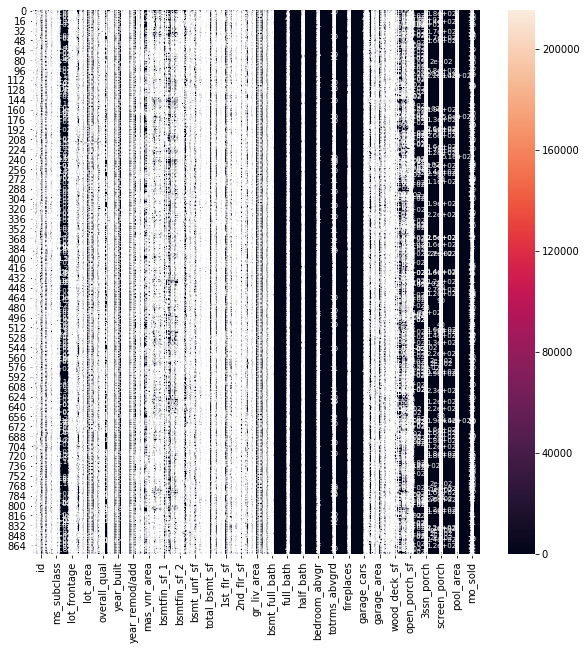

In [248]:
plt.figure(figsize=(10,10))
sns.heatmap(test, annot=True, annot_kws={'size': 7});

In [153]:
#train = train.select_dtypes(exclude=['object'])


In [170]:
#just clean X and test
X= train.drop('saleprice', axis=1)
y=train['saleprice']

In [172]:
test.shape

(879, 46)

In [173]:
X = X._get_numeric_data()
test = test._get_numeric_data()

In [175]:
feats = list(test.columns)

In [176]:
X = X[feats]

In [194]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)

In [193]:
ss= StandardScaler()
ss.fit(X_train)
X_train_s=ss.transform(X_train)
X_test_s=ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Linear Regression Model 

In [201]:
lr=LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train,y_train), lr.score(X_test,y_test)

(0.816629259964979, 0.8539153994760516)

In [203]:
predict=lr.predict(X)
predict

array([178427.14247699, 242714.27640749, 133168.7756773 , ...,
       162890.25285427, 121826.75659254, 210436.6758067 ])

In [205]:
np.sqrt(mean_squared_error(y,lr.predict(X)))

33075.787237476085

### Ridge Regression  Model 

In [242]:
ridge_alphas=np.logspace(0,5,1000)
rcv=RidgeCV(ridge_alphas, cv=3)
rcv.fit(X_train_s,y_train)
print(rcv.score(X_train_s,y_train)) 
print(rcv.score(X_test_s,y_test))

0.8085639527000743
0.8481252678077104


In [228]:
r_preds=rcv.predict(X_test_s)
r_preds[0:5]

array([125126.09285812, 229633.84179405, 259109.64975677, 123632.43974863,
       203856.53510432])

### Lasso Regression Model 

In [239]:
l_alphas = np.arange(0.15, 1, 0.01)

In [240]:
lcv=LassoCV(alphas=l_alphas,cv=3, max_iter=10000)
lcv.fit(X_train_s,y_train)
print(lcv.score(X_train_s, y_train))
print(lcv.score(X_test_s, y_test))

0.8166292348256015
0.8539300062668224


In [241]:
pred_La = lcv.predict(X_test_s)
pred_La_train= lcv.predict(X_train_s)
print(pred_La[0:3])
print(pred_La_train[0:3])

[118279.06650912 231693.38969236 266776.24947246]
[198468.43048938 236860.92913337 137852.29266564]


In [246]:
lcv.get_params

<bound method BaseEstimator.get_params of LassoCV(alphas=array([0.15, 0.16, ..., 0.98, 0.99]), copy_X=True, cv=3,
    eps=0.001, fit_intercept=True, max_iter=10000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)>

### Pipeline Model 

In [216]:
pipe= Pipeline([('pf', PolynomialFeatures(include_bias=False)),
               ('ss', StandardScaler()),
               ('lcv', LassoCV(max_iter=10000))])

In [217]:
pipe.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Pipeline(memory=None,
     steps=[('pf', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lcv', LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])

In [218]:
pipe.score(X_train,y_train)

0.8775985002209951

In [219]:
pipe.score(X_test,y_test)

0.8895543674989904

In [220]:
preds= pipe.predict(X_test)

In [221]:
np.sqrt(mean_squared_error(y_test,preds))

26041.10049347051

In [245]:
pipe.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('pf', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lcv', LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])>

In [146]:
#pipe.predict(test)

In [93]:
pipe_submit = pd.DataFrame({
    'Id': test['id'],
    'SalePrice': pipe.predict(test)
})
pipe_submit.head()

,Id,SalePrice
0,2658,142866.460627
1,2718,160935.377470
2,2414,215170.395201
3,1989,119091.443349
4,625,194577.648251


In [94]:
pipe_submit.to_csv('../submissions/pipe_submit.csv', index=False)